In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
M = 374
# M = 587

a = pd.read_csv(f"/Users/helenology/Desktop/[M={M}]rmse_data.csv")
a.head()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/helenology/Desktop/[M=374]rmse_data.csv'

In [3]:
a.columns

Index(['Unnamed: 0', 'seed', 'n', 'alpha', 'M', 'init_beta', 'init_sigma',
       'os_beta', 'os_sigma', 'ts_beta', 'ts_sigma', 'oracle_beta'],
      dtype='object')

In [4]:
print(a.shape)

(100, 12)


In [5]:
def box_plot(data, edge_color, fill_color):
    bp = ax.boxplot(data, patch_artist=True)
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)       
        
    return bp

In [6]:
print(f"#### Mean ####")
print(f"initial: {np.mean(a.init_beta):6f}")
print(f"OS: {np.mean(a.os_beta):6f}")
print(f"TS: {np.mean(a.ts_beta):6f}")
print(f"Oracle: {np.mean(a.oracle_beta):6f}")
print(f"\n#### Median ####")
print(f"initial: {np.median(a.init_beta):6f}")
print(f"OS: {np.median(a.os_beta):6f}")
print(f"TS: {np.median(a.ts_beta):6f}")
print(f"Oracle: {np.median(a.oracle_beta):6f}")

#### Mean ####
initial: 0.029638
OS: 0.019362
TS: 0.017703
Oracle: 0.017678

#### Median ####
initial: 0.028913
OS: 0.018908
TS: 0.017539
Oracle: 0.017147


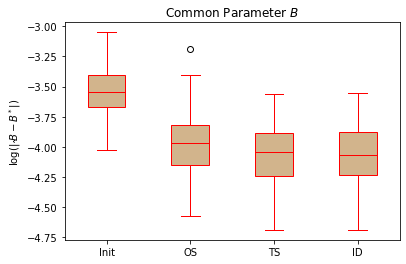

In [13]:
data1 = np.log(np.array(a.init_beta))
data2 = np.log(np.array(a.os_beta))
data3 = np.log(np.array(a.ts_beta))
data4 = np.log(np.array(a.oracle_beta))
beta_data = [data1, data2, data3, data4]

fig, ax = plt.subplots()
bp1 = box_plot(beta_data, 'red', 'tan')
# ax.legend([bp1["boxes"][0]], ['Raw'])
# ax.set_ylim(0, 10)
plt.ylabel(r"$\log(|\hat B - B^*|$)")
plt.title("Common Parameter $B$")
plt.xticks(range(1, len(beta_data)+1), labels=["Init", "OS", "TS", "ID"], rotation=0)
plt.show()

In [14]:
data1 = np.log(np.array(a.init_sigma))
data2 = np.log(np.array(a.os_sigma))
data3 = np.log(np.array(a.ts_sigma))

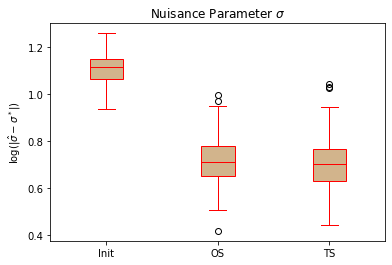

In [15]:
sigma_data = [data1, data2, data3]

fig, ax = plt.subplots()
bp1 = box_plot(sigma_data, 'red', 'tan')
# ax.legend([bp1["boxes"][0], bp2["boxes"][0]], ['Raw', 'Rescale'])
# ax.set_ylim(0, 10)
plt.ylabel(r"$\log(|\hat\sigma - \sigma^*|)$")
plt.title(r"Nuisance Parameter $\sigma$")
plt.xticks(range(1, len(sigma_data)+1), labels=["Init", "OS", "TS"], rotation=0)
plt.show()